In [1]:
from manim import *


backfold_scene_main = f" -v WARNING --disable_caching -r {2048},{2048} -s backfold_Scene"

Manim Community v0.19.0

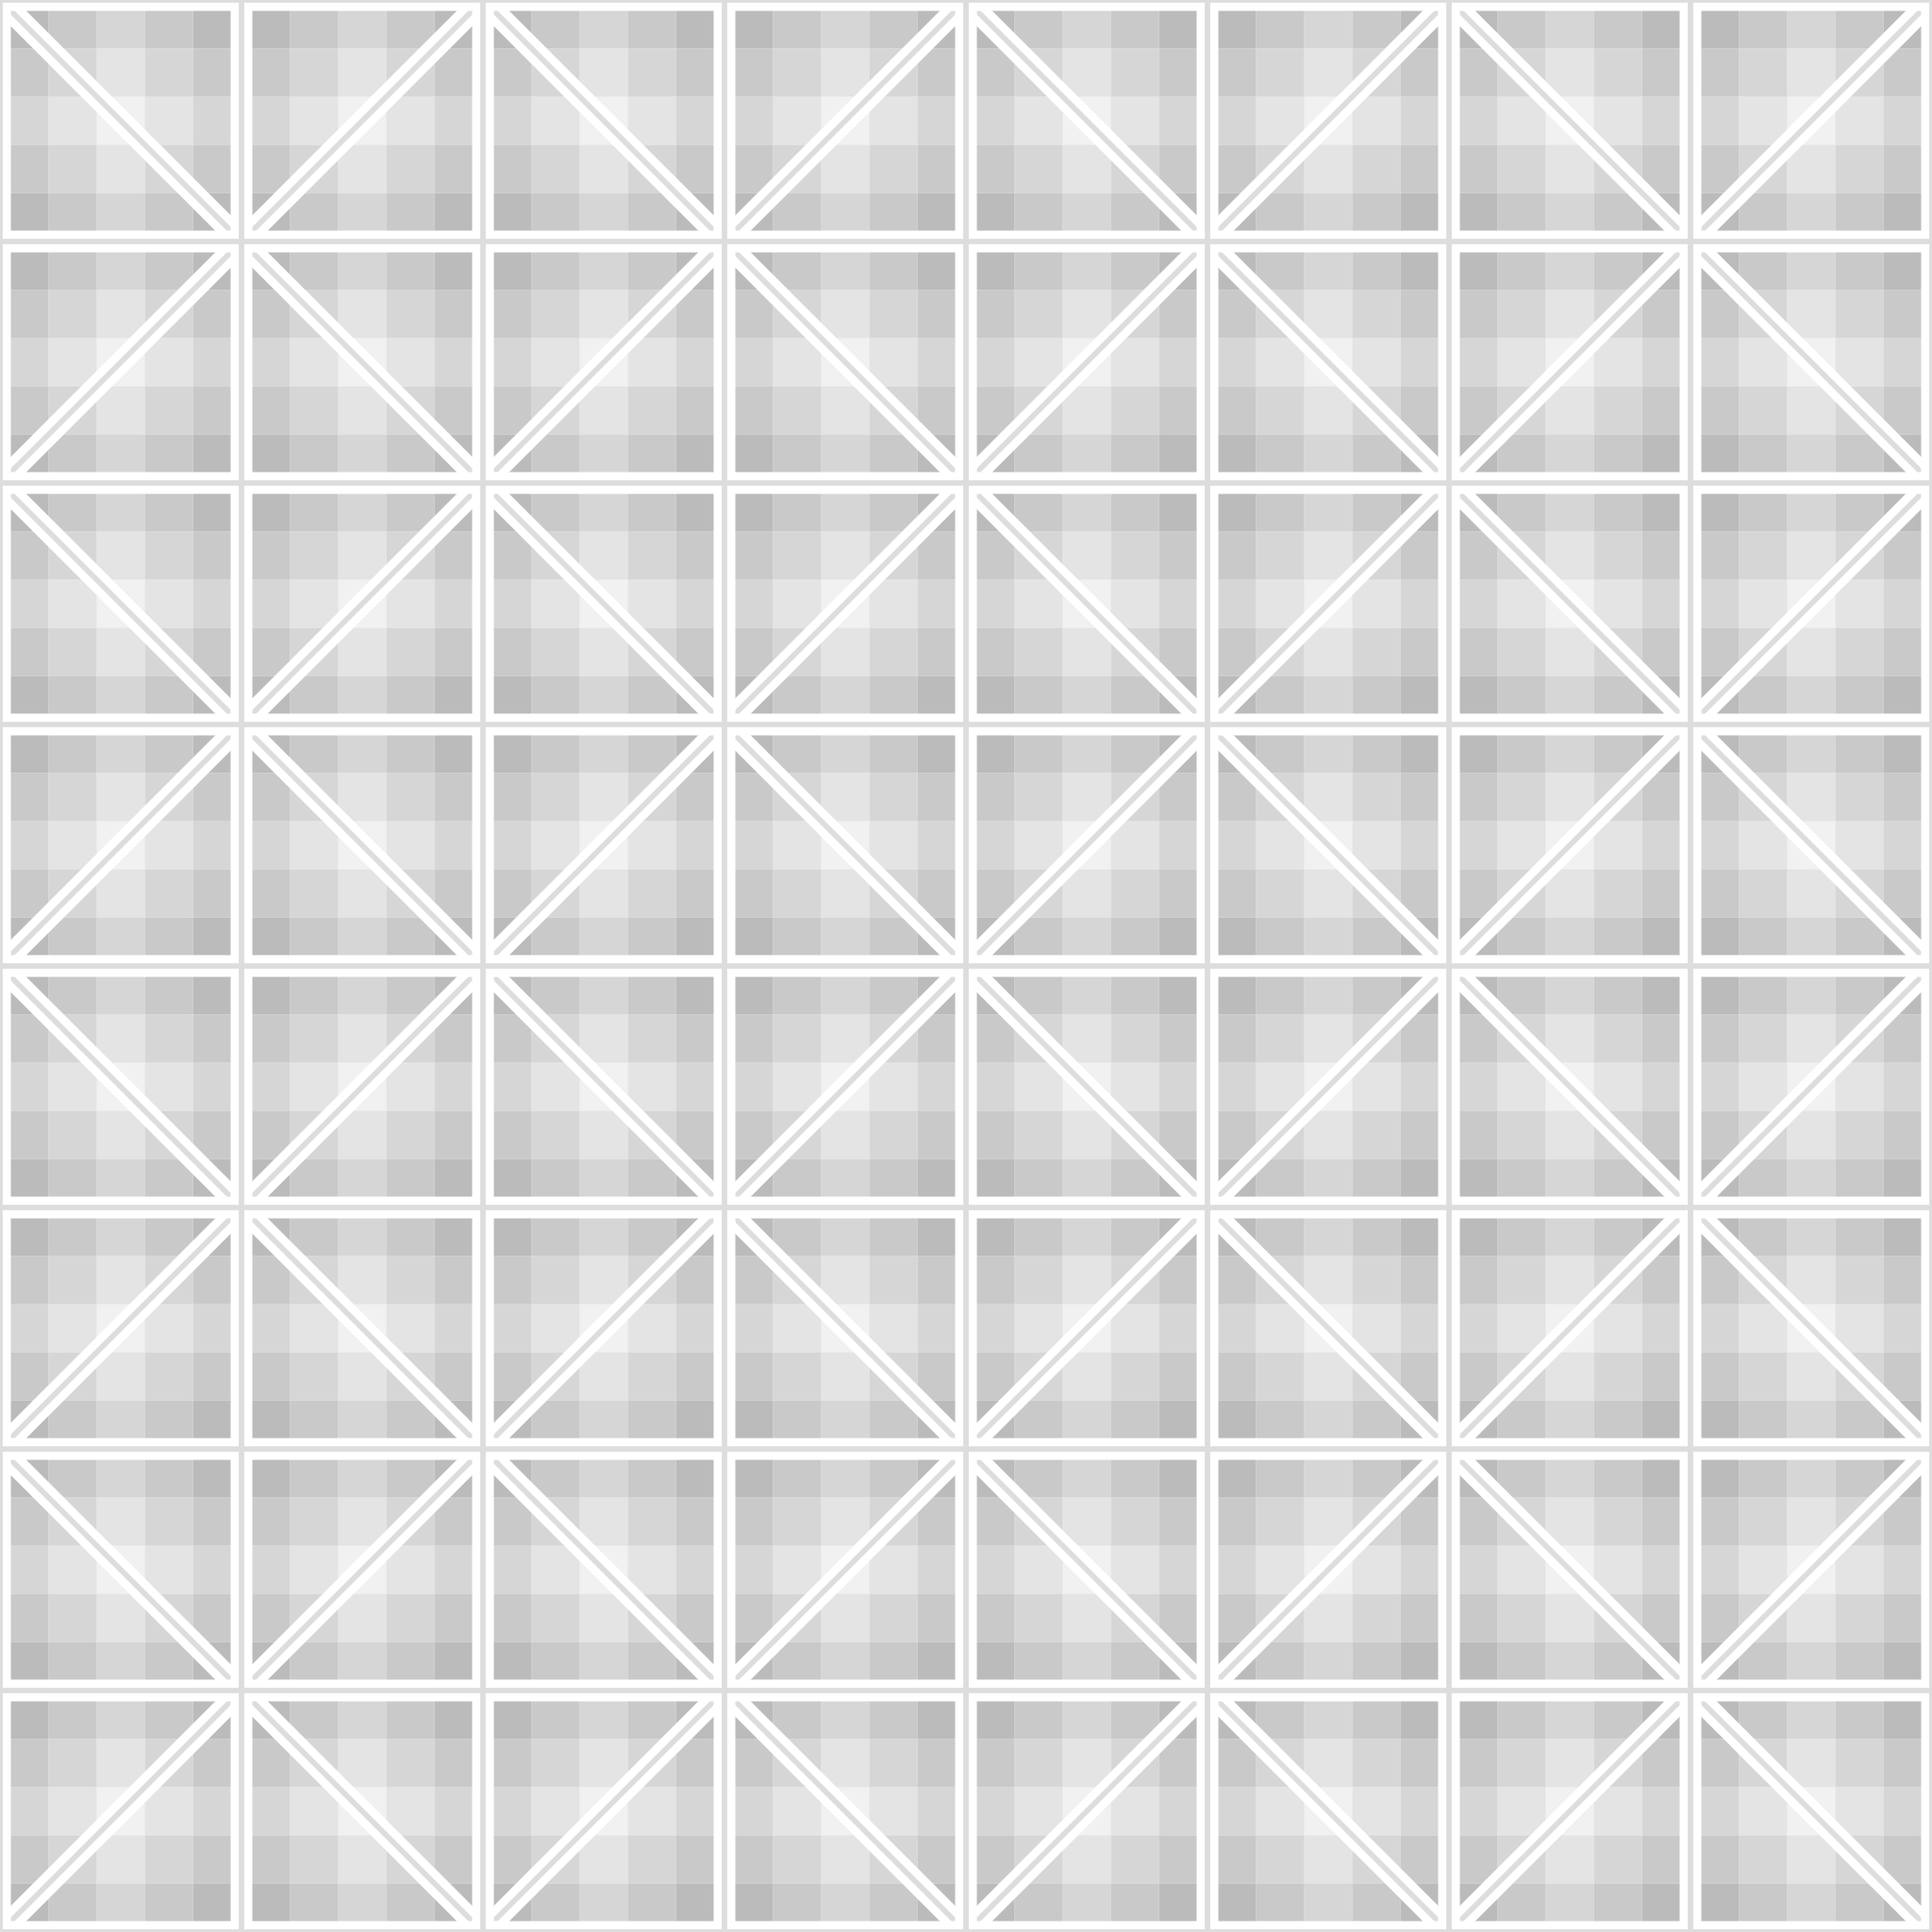

In [20]:
%%manim -qh --fps 60 $backfold_scene_main


class backfold_Scene(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        # geometry of the rectangles
        screen_width = 8*1.7777777777777777777777777
        quadrant_width = screen_width / 4
        tl_origin = np.array([-2*quadrant_width, 2*quadrant_width, 0])
        stroke_width = 16


        # background pattern
        octant_width = quadrant_width / 2
        pattern_square_width = octant_width / 5
        for m in range(8):
            for n in range(8):
                tl_octant_origin = tl_origin + np.array([m*octant_width, -n*octant_width, 0])
                for i in range(5):
                    for j in range(5):
                        square_center = tl_octant_origin + np.array([(i+0.5)*pattern_square_width, -(j+0.5)*pattern_square_width, 0])
                        # corners with alpha = 1
                        if (i == 0 or i == 4) and (j == 0 or j == 4):
                            self.add(Square(side_length = pattern_square_width, color = LIGHT_GRAY, fill_color = LIGHT_GRAY, stroke_opacity = 0, fill_opacity = 1).move_to(square_center))
                        # next to corner with alpha = 0.8
                        elif ((i == 0 or i == 4) and (j == 1 or j == 3)) or ((i == 1 or i == 3) and (j == 0 or j == 4)):
                            self.add(Square(side_length = pattern_square_width, color =LIGHT_GRAY, fill_color =LIGHT_GRAY, stroke_opacity = 0, fill_opacity = 0.8).move_to(square_center))
                        # middle four at alpha = 0.4
                        elif ((i == 1 or i == 3) and (j == 2)) or ((i == 2) and (j == 1 or j == 3)):
                            self.add(Square(side_length = pattern_square_width, color = LIGHT_GRAY, fill_color = LIGHT_GRAY, stroke_opacity = 0, fill_opacity = 0.4).move_to(square_center))
                        # center at alpha = 0.2
                        elif (i == 2 and j == 2):
                            self.add(Square(side_length = pattern_square_width, color = LIGHT_GRAY, fill_color = LIGHT_GRAY, stroke_opacity = 0, fill_opacity = 0.2).move_to(square_center))
                        else:
                            self.add(Square(side_length = pattern_square_width, color = LIGHT_GRAY, fill_color = LIGHT_GRAY, stroke_opacity = 0, fill_opacity = 0.6).move_to(square_center))



        # m x n matrix coordinates
        def get_cross_light(m, n):
            tl_line_start = tl_origin + np.array([m*quadrant_width, -n*quadrant_width, 0])
            tl_line_end = tl_origin + np.array([(m+1)*quadrant_width, -(n+1)*quadrant_width, 0])

            dl_line_start = tl_origin + np.array([(m+1)*quadrant_width, -n*quadrant_width, 0])
            dl_line_end = tl_origin + np.array([(m)*quadrant_width, -(n+1)*quadrant_width, 0])

            tl_line = Line(start = tl_line_start, end = tl_line_end, stroke_width = stroke_width, color = WHITE)
            dl_line = Line(start = dl_line_start, end = dl_line_end, stroke_width = stroke_width, color = WHITE)
            return VGroup(tl_line, dl_line)


        def get_cross_dark(m, n):
            tl_line_start = tl_origin + np.array([m*quadrant_width, -n*quadrant_width, 0])
            tl_line_end = tl_origin + np.array([(m+1)*quadrant_width, -(n+1)*quadrant_width, 0])

            dl_line_start = tl_origin + np.array([(m+1)*quadrant_width, -n*quadrant_width, 0])
            dl_line_end = tl_origin + np.array([(m)*quadrant_width, -(n+1)*quadrant_width, 0])

            tl_line = Line(start = tl_line_start, end = tl_line_end, stroke_width = stroke_width/4, color = LIGHTER_GREY)
            dl_line = Line(start = dl_line_start, end = dl_line_end, stroke_width = stroke_width/4, color = LIGHTER_GREY)
            return VGroup(tl_line, dl_line)


        # produce light lines
        full_screen_rectangle_light = Rectangle(height = screen_width, width = screen_width, grid_xstep = screen_width/8, grid_ystep = screen_width/8, stroke_width = stroke_width, color = WHITE)
        full_screen_rectangle_light.grid_lines.set_stroke(width = stroke_width)

        for m in range(8):
            for n in range(8):
                self.add(get_cross_light(m, n))


        # produce dark lines
        full_screen_rectangle_dark = Rectangle(height = screen_width, width = screen_width, grid_xstep = screen_width/8, grid_ystep = screen_width/8, stroke_width = stroke_width/4, color = LIGHTER_GREY)
        full_screen_rectangle_dark.grid_lines.set_stroke(width = stroke_width/4)

        for m in range(8):
            for n in range(8):
                self.add(get_cross_dark(m, n))

        self.add(full_screen_rectangle_light)
        self.add(full_screen_rectangle_dark)
